C:\Users\SACHIN KUMAR\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SACHIN KUMAR\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SACHIN KUMAR\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\SACHI

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       189
         1.0       0.90      0.93      0.91       191

    accuracy                           0.91       380
   macro avg       0.91      0.91      0.91       380
weighted avg       0.91      0.91      0.91       380

Confusion Matrix:
 [[170  19]
 [ 14 177]]


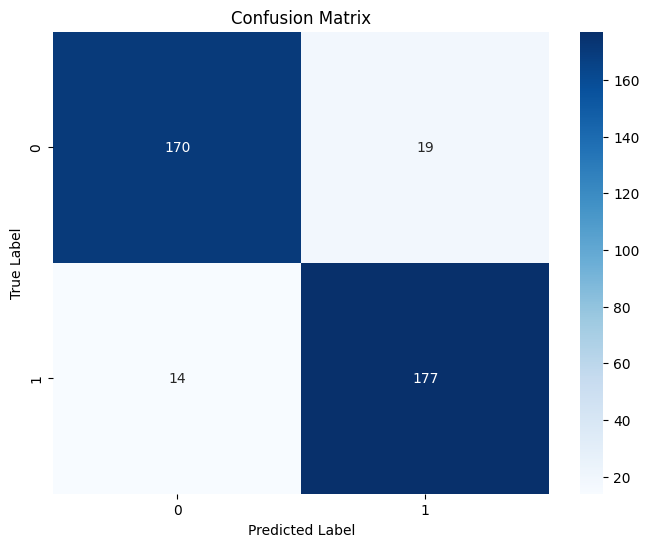

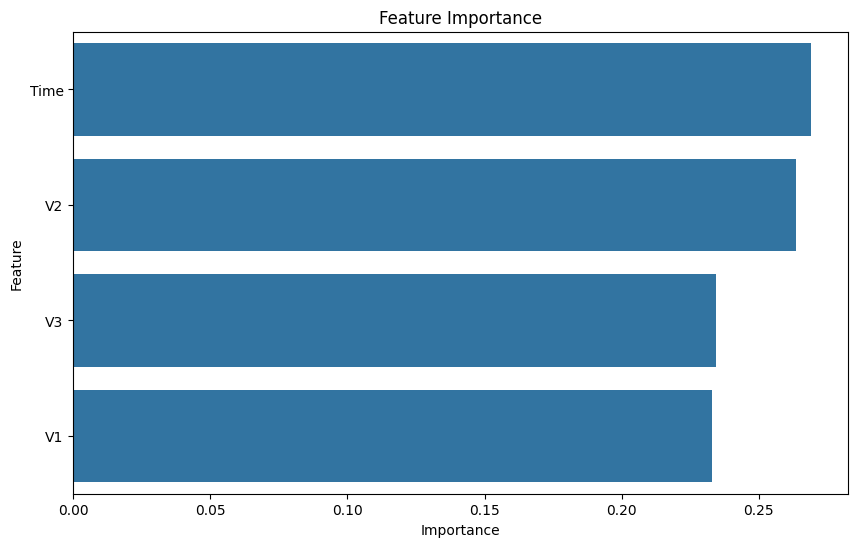

Cross-Validation F1 Score: 0.9082


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your dataset path)
# df = pd.read_csv("C:/Users/SACHIN KUMAR/OneDrive/Desktop/data analytics/7th/creditcard.csv")

# Sample dataset creation for demonstration with more samples
# Replace this with actual data when available
data = {
    'Time': np.random.randint(0, 100000, size=1000),
    'V1': np.random.normal(0, 1, size=1000),
    'V2': np.random.normal(0, 1, size=1000),
    'V3': np.random.normal(0, 1, size=1000),
    'Class': np.concatenate([np.zeros(950), np.ones(50)])  # 0: Not Fraud, 1: Fraud
}
df = pd.DataFrame(data)

# 1. Data Preprocessing
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. Model Training with Random Forest and Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# 5. Model Evaluation
y_pred = best_model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 6. Data Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 7. Feature Importance
importance = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# 8. Cross-Validation Score
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='f1')
print(f"Cross-Validation F1 Score: {np.mean(cv_scores):.4f}")
